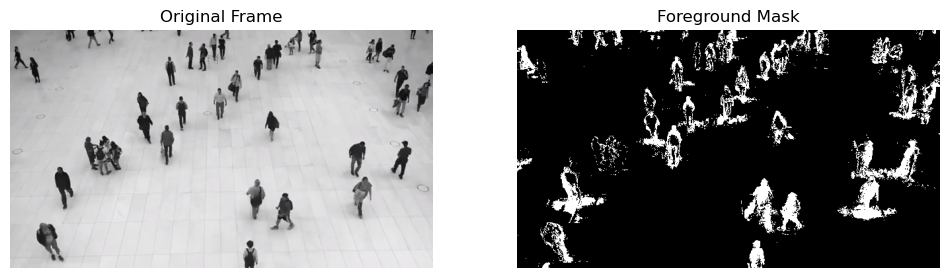

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

cap = cv2.VideoCapture("video.mp4")
fgbg = cv2.createBackgroundSubtractorMOG2(history=200, varThreshold=25, detectShadows=False)

for _ in range(50):
    ret, frame = cap.read()
    if not ret:
        break
    fgbg.apply(frame)

plt.ion()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
fgmask = fgbg.apply(frame)

img1 = ax1.imshow(frame_rgb)
img2 = ax2.imshow(fgmask, cmap='gray')

ax1.set_title('Original Frame')
ax2.set_title('Foreground Mask')
ax1.axis('off')
ax2.axis('off')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    fgmask = fgbg.apply(frame)

    img1.set_data(frame_rgb)
    img2.set_data(fgmask)
    plt.pause(0.03)

plt.ioff()
plt.show()
cap.release()


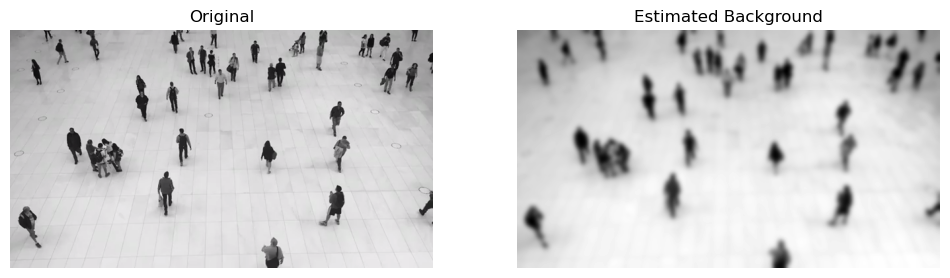

In [2]:
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

avg = None
alpha = 0.05

plt.ion()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ret, frame = cap.read()
if not ret:
    cap.release()
else:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)
    avg = np.float32(gray)
    background = gray

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img1 = ax1.imshow(frame_rgb)
    img2 = ax2.imshow(background, cmap='gray')

    ax1.set_title("Original")
    ax2.set_title("Estimated Background")
    ax1.axis("off")
    ax2.axis("off")

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (21, 21), 0)

        cv2.accumulateWeighted(gray, avg, alpha)
        background = cv2.convertScaleAbs(avg)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        img1.set_data(frame_rgb)
        img2.set_data(background)

        plt.pause(0.03)

    cap.release()
    plt.ioff()
    plt.show()

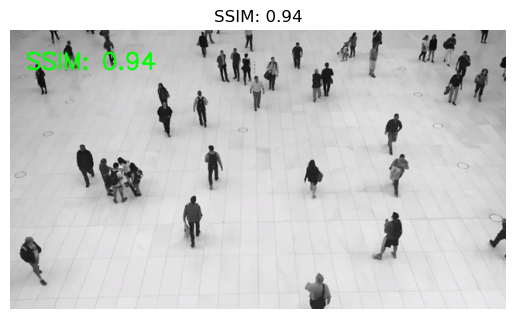

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

ret, prev_frame = cap.read()
if not ret:
    print("Error: Could not read the video file.")
    cap.release()
    exit()

plt.ion()
fig, ax = plt.subplots()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    gray_prev = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    gray_curr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    similarity = ssim(gray_prev, gray_curr)

    cv2.putText(frame, f'SSIM: {similarity:.2f}', (20, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(rgb_frame)
    ax.set_title(f'SSIM: {similarity:.2f}')
    ax.axis('off')
    plt.pause(0.03)

    prev_frame = frame.copy()
